# Things I want to Accomplish with this Dataset

### Objectives
---
- See which artists appear in which decades
- See who was in the Billboard Top 100 the most (Done)
- See who has appeared more than 10 times (Done)
- Separate the lyrics and see what words were most used by decade
 - Use Wordcloud to visualize which words were used most by decade

### Importing the Necessities

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import regex as re
from wordcloud import WordCloud, STOPWORDS

In [3]:
# Importing the Billboard Top 100 Data
lyrics = pd.read_csv('billboard_lyrics_1964-2015.csv', encoding = 'Latin-1')

In [4]:
lyrics

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0
...,...,...,...,...,...,...
5095,96,el perdon,nicky jam and enrique iglesias,2015,enrique iglesias dime si es verdad me dijeron ...,3.0
5096,97,she knows,neyo featuring juicy j,2015,NaN,NaN
5097,98,night changes,one direction,2015,going out tonight changes into something red ...,1.0
5098,99,back to back,drake,2015,oh man oh man oh man not againyeah i learned ...,1.0


### Setting up the Data for Basic Info checking

In [31]:
# Grouping the Data by Artist
artist = lyrics.groupby(by='Artist')
# A method use to call on a prticular artist
artist.get_group('madonna')

,Rank,Song,Artist,Year,Lyrics,Source
1934,35,borderline,madonna,1984,something in the way you love me wont let me ...,1.0
1965,66,lucky star,madonna,1984,you must be my lucky star cause you shine on ...,1.0
1978,79,holiday,madonna,1984,holiday celebrate holiday celebrateif we took...,1.0
2001,2,like a virgin,madonna,1985,i made it through the wilderness somehow i ma...,1.0
2008,9,crazy for you,madonna,1985,swaying room as the music starts strangers ma...,1.0
2057,58,material girl,madonna,1985,some boys kiss me some boys hug me i think th...,1.0
2080,81,angel,madonna,1985,why am i standing on a cloud every time youre...,1.0
2097,98,dress you up,madonna,1985,youve got style thats what all the girls say ...,1.0
2128,29,papa dont preach,madonna,1986,,1.0
2134,35,live to tell,madonna,1986,i have a tale to tell sometimes it gets so ha...,1.0


In [6]:
# Grouping the Data by Year
year = lyrics.groupby(by='Year')
# Checking to see if it groups by Year properly
year.get_group(2015)

,Rank,Song,Artist,Year,Lyrics,Source
5000,1,uptown funk,mark ronson featuring bruno mars,2015,this hit that ice cold michelle pfeiffer that...,1.0
5001,2,thinking out loud,ed sheeran,2015,when your legs dont work like they used to be...,1.0
5002,3,see you again,wiz khalifa featuring charlie puth,2015,its been a long day without you my friend and...,1.0
5003,4,trap queen,fetty wap,2015,im like hey wassup hello seen yo pretty ass s...,1.0
5004,5,sugar,maroon 5,2015,im hurting baby im broken down i need your lo...,1.0
...,...,...,...,...,...,...
5095,96,el perdon,nicky jam and enrique iglesias,2015,enrique iglesias dime si es verdad me dijeron ...,3.0
5096,97,she knows,neyo featuring juicy j,2015,NaN,NaN
5097,98,night changes,one direction,2015,going out tonight changes into something red ...,1.0
5098,99,back to back,drake,2015,oh man oh man oh man not againyeah i learned ...,1.0


### Finding who has the most hits on the Billboard Top 100

In [7]:
# Making an empty dictionary
artist_count = dict()

#Using iterrows over the Pandas DataFrame to add up the count for each Artist in the Dataset
for index, row in lyrics.iterrows():
#     If the Artist isn't yet in the Dictionary, it adds them. Otherwise it increments plus one.
    if row['Artist'] not in artist_count:
        artist_count[row['Artist']] = 1
    else:
        artist_count[row['Artist']] += 1

In [8]:
# Finding the max value in the Dictionary
max(artist_count.values())

35

In [9]:
# Checking to see if more than one Artist has the max value and if so, which Artist is it
for i, j in artist_count.items():
    if artist_count[i] == 35:
        print(i)

madonna


### Charting the Artists who made the Billboard Top 100 more than 10 times

In [61]:
# A Dictionary Comprehension used to make a new Dictionary with Artists that have been on the Billboard more than 10 Times
major_artists = {key: value for (key, value) in artist_count.items() if value >= 10 }
print(len(major_artists))

# Sorting the Dictionary from Max number to 10 so it is easier to interpret on a Bar chart
major_artists_sort = {k: v for k, v in sorted(major_artists.items(), key=lambda item: item[1], reverse=True)}
print(major_artists_sort)

59
{'madonna': 35, 'elton john': 26, 'mariah carey': 25, 'stevie wonder': 22, 'michael jackson': 22, 'janet jackson': 22, 'whitney houston': 19, 'rihanna': 19, 'taylor swift': 19, 'the beatles': 17, 'pink': 17, 'kelly clarkson': 17, 'britney spears': 16, 'the black eyed peas': 16, 'chicago': 15, 'aretha franklin': 14, 'rod stewart': 14, 'usher': 14, 'katy perry': 14, 'the rolling stones': 13, 'kool  the gang': 13, 'phil collins': 13, 'boyz ii men': 13, 'r kelly': 13, 'maroon 5': 13, 'the temptations': 12, 'neil diamond': 12, 'bee gees': 12, 'olivia newtonjohn': 12, 'aerosmith': 12, 'billy joel': 12, 'lionel richie': 12, 'eminem': 12, 'beyonce': 12, 'cher': 11, 'the carpenters': 11, 'diana ross': 11, 'barry manilow': 11, 'daryl hall  john oates': 11, 'duran duran': 11, 'bryan adams': 11, 'bon jovi': 11, 'george michael': 11, 'aaliyah': 11, 'destinys child': 11, 'alicia keys': 11, 'nickelback': 11, 'the supremes': 10, 'marvin gaye': 10, 'donna summer': 10, 'fleetwood mac': 10, 'genesis':

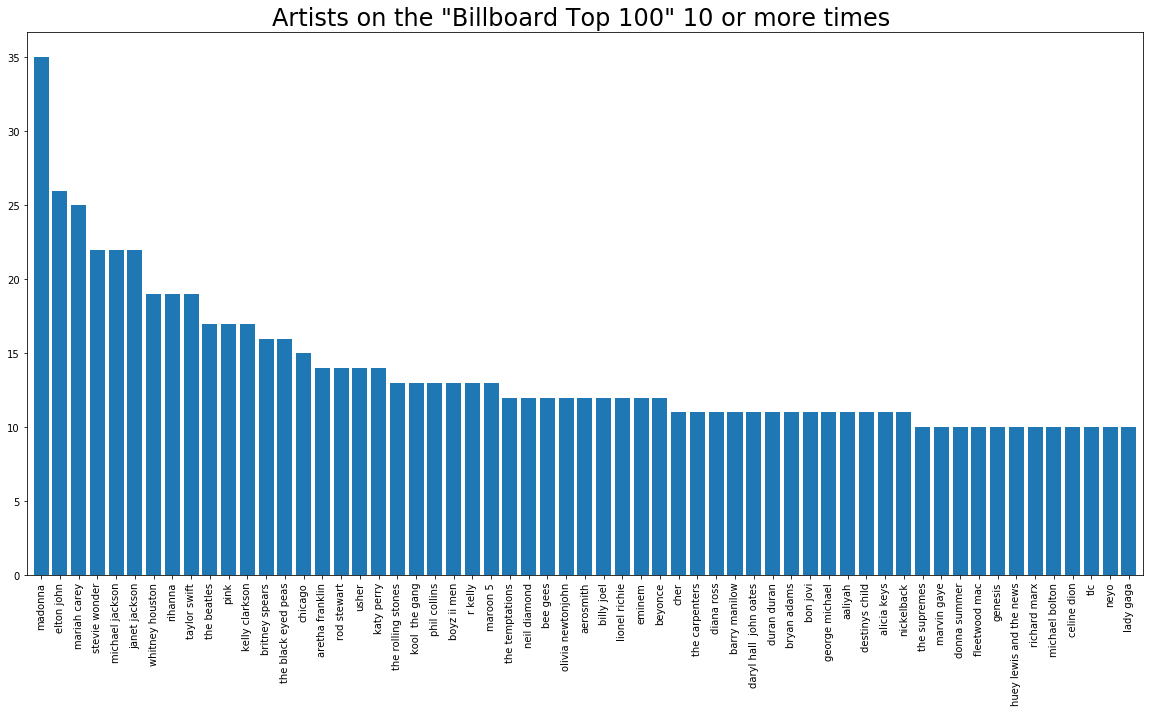

In [62]:
# Plotting the Dictionary onto a Bar Chart
plt.figure(figsize = (20,10))
plt.bar(major_artists_sort.keys(), major_artists_sort.values())
plt.xticks(rotation=90)
plt.xlim(-0.75, 58.75)
plt.title('Artists on the "Billboard Top 100" 10 or more times ', size = 24)
plt.show()

### Playing with WordClouds

In [108]:
# Checking how to isolate lyrics
lyrics.iloc[534]['Lyrics']

' i was born and raised down in alabama on a farm way back up in the woods i was so ragged that folks used to call me patches papa used to tease me about it cause deep down inside he was hurt cause hed done all he couldmy papa was a great old man i can see him with a shovel in his hands see education he never had he did wonders when the times got bad the little money from the crops he raised barely paid the bills we madefor life had kick him down to the ground when he tried to get up life would kick him back down one day papa called me to his dyin bed put his hands on my shoulders and in his tears he saidhe said patches im dependin on you son to pull the family through my son its all left up to youtwo days later papa passed away and i became a man that day so i told mama i was gonna quit school but she said that was daddys strictest ruleso every mornin fore i went to school i fed the chickens and i chopped wood too sometimes i felt that i couldnt go on i wanted to leave just run away f

In [117]:
# Checking how to isolate artists without groupby
lyrics.loc[lyrics['Artist'] == 'madonna']

,Rank,Song,Artist,Year,Lyrics,Source
1934,35,borderline,madonna,1984,something in the way you love me wont let me ...,1.0
1965,66,lucky star,madonna,1984,you must be my lucky star cause you shine on ...,1.0
1978,79,holiday,madonna,1984,holiday celebrate holiday celebrateif we took...,1.0
2001,2,like a virgin,madonna,1985,i made it through the wilderness somehow i ma...,1.0
2008,9,crazy for you,madonna,1985,swaying room as the music starts strangers ma...,1.0
2057,58,material girl,madonna,1985,some boys kiss me some boys hug me i think th...,1.0
2080,81,angel,madonna,1985,why am i standing on a cloud every time youre...,1.0
2097,98,dress you up,madonna,1985,youve got style thats what all the girls say ...,1.0
2128,29,papa dont preach,madonna,1986,,1.0
2134,35,live to tell,madonna,1986,i have a tale to tell sometimes it gets so ha...,1.0


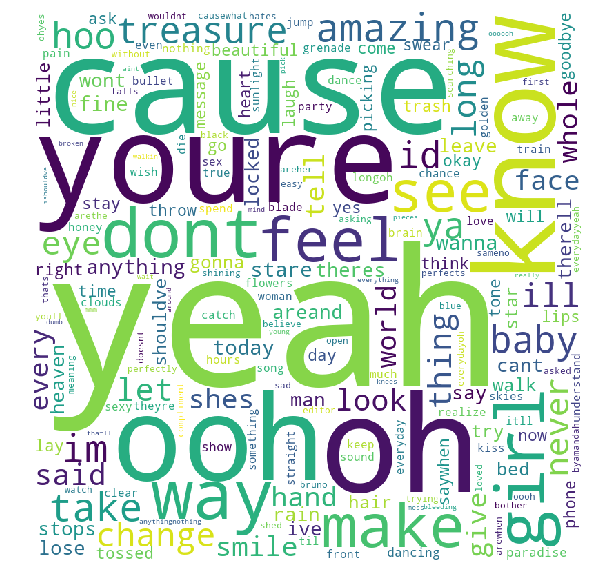

In [32]:
# Testing out WordCloud with just a single artist
comment_words = ' '
stopwords = set(STOPWORDS) 

for val in artist.get_group('bruno mars').Lyrics: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                relative_scaling = 0.5,
                collocations = False,
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [124]:
# Creating a new DataFrame just with the artists that were on the Top Billboard 100 more than 10 times
top_artists = pd.DataFrame(columns = ['Rank', 'Song', 'Artist', 'Year', 'Lyrics', 'Source'])

for artist in major_artists:
    top_artists = top_artists.append(lyrics.loc[lyrics['Artist'] == artist])
    
top_artists

,Rank,Song,Artist,Year,Lyrics,Source
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
87,88,the last time,the rolling stones,1965,well i told you once and i told you twice but ...,3.0
120,21,paint it black,the rolling stones,1966,i see a red door and i want it painted black n...,3.0
161,62,19th nervous breakdown,the rolling stones,1966,youre the kind of person you meet at certain d...,3.0
223,24,ruby tuesday,the rolling stones,1967,she would never say where she came from yester...,3.0
...,...,...,...,...,...,...
4563,64,paparazzi,lady gaga,2010,we are the crowd were ccoming out got my flas...,1.0
4617,18,born this way,lady gaga,2011,it doesnt matter if you love him or capital h...,1.0
4628,29,the edge of glory,lady gaga,2011,there aint no reason you and me should be alon...,3.0
4670,71,"yo""u and i",lady gaga,2011,its been a long time since i came around been ...,3.0


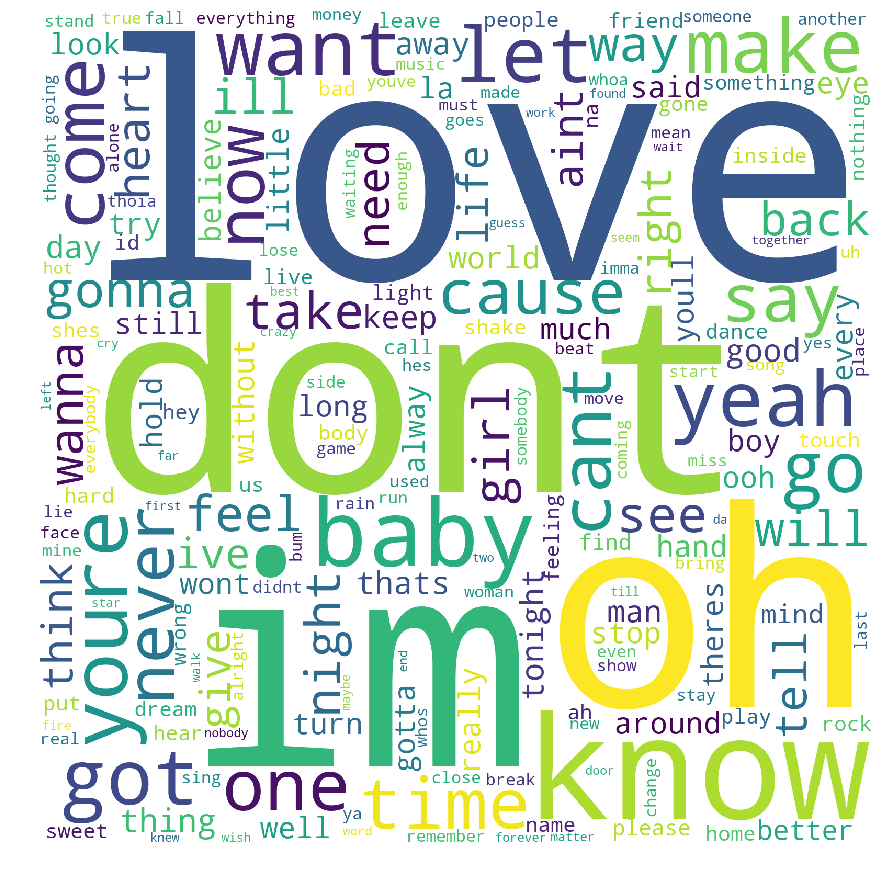

In [127]:
# Creating a WordCloud using the lyrics from all the artists that were in the Top Billboard 100 more than 10 times

comment_words = ' '
stopwords = set(STOPWORDS) 

for val in top_artists.Lyrics: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                relative_scaling = 0.5,
                collocations = False,
                scale = 2,
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Separating Artists by Decades

In [9]:
artists_1960s = lyrics[lyrics['Year'] < 1970]
artists_1960s.head()

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0


In [19]:
artists_1970s = lyrics[(lyrics['Year'] >= 1970) & (lyrics['Year'] < 1980)]
artists_1970s.head()

,Rank,Song,Artist,Year,Lyrics,Source
500,1,bridge over troubled water,simon garfunkel,1970,when youre weary feeling small when tears are ...,3.0
501,2,they long to be close to you,the carpenters,1970,close to youwhy do birds suddenly appear ever...,1.0
502,3,american woman,the guess who,1970,umm taa taana umm taa taana umm umm taa taana ...,3.0
503,4,raindrops keep fallin on my head,bj thomas,1970,raindrops are falling on my head and just lik...,1.0
504,5,war,edwin starr,1970,war huh yeah what is it good for absolutely n...,1.0


In [21]:
artists_1980s = lyrics[(lyrics['Year'] >= 1980) & (lyrics['Year'] < 1990)]
artists_1980s.head()

,Rank,Song,Artist,Year,Lyrics,Source
1500,1,call me,blondie,1980,color me your color baby color me your car co...,1.0
1501,2,another brick in the wall part ii,pink floyd,1980,we dont need no education we dont need no tho...,1.0
1502,3,magic,olivia newtonjohn,1980,come take my hand you should know me ive alwa...,1.0
1503,4,rock with you,michael jackson,1980,girl close your eyes let that rhythm get into...,1.0
1504,5,do that to me one more time,captain tennille,1980,do that to me one more time once is never enou...,3.0


In [24]:
artists_1990s = lyrics[(lyrics['Year'] >= 1990) & (lyrics['Year'] < 2000)]
artists_1990s.tail()

,Rank,Song,Artist,Year,Lyrics,Source
3495,96,better days and the bottom drops out,citizen king,1999,in my shoes my toes are busted my kitchen say...,1.0
3496,97,music of my heart,n sync and gloria estefan,1999,youll never know what youve done for me what y...,3.0
3497,98,write this down,george strait,1999,i never saw the end in sight fools are kind o...,1.0
3498,99,when you believe,whitney houston and mariah carey,1999,many nights we prayed with no proof anyone co...,1.0
3499,100,god must have spent a little more time on you,alabama and n sync,1999,can this be true tell me can this be real how...,1.0


In [26]:
artists_2000s = lyrics[(lyrics['Year'] >= 2000) & (lyrics['Year'] < 2010)]
artists_2000s.head()

,Rank,Song,Artist,Year,Lyrics,Source
3500,1,breathe,faith hill,2000,i can feel the magic floating in the air bein...,1.0
3501,2,smooth,santana featuring rob thomas,2000,man its a hot one like seven inches from the ...,1.0
3502,3,maria maria,santana featuring the product gb,2000,ladies and gents turn up your sound systems t...,1.0
3503,4,i wanna know,joe,2000,yeah oh yeah alright oh oh ohits amazing how ...,1.0
3504,5,everything you want,vertical horizon,2000,somewhere theres speaking its already coming ...,1.0


In [28]:
artists_2010s = lyrics[lyrics['Year'] >= 2010]
artists_2010s.head()

,Rank,Song,Artist,Year,Lyrics,Source
4500,1,tik tok,keha,2010,wake up in the morning feeling like p diddy h...,1.0
4501,2,need you now,lady antebellum,2010,picture perfect memories scattered all around...,1.0
4502,3,hey soul sister,train,2010,hey hey hey hey hey heyyour lipstick stains o...,1.0
4503,4,california gurls,katy perry featuring snoop dogg,2010,snoop dogg greetings loved ones lets take a j...,1.0
4504,5,omg,usher featuring william,2010,oh my gosh baby let me did it again so imma l...,1.0
